# 日历图

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#常规热力图" data-toc-modified-id="常规热力图-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>常规热力图</a></span><ul class="toc-item"><li><span><a href="#获取数据" data-toc-modified-id="获取数据-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>获取数据</a></span></li><li><span><a href="#自定义颜色及colormap的线性映射" data-toc-modified-id="自定义颜色及colormap的线性映射-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>自定义颜色及colormap的线性映射</a></span></li></ul></li><li><span><a href="#自定义热力图标签" data-toc-modified-id="自定义热力图标签-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>自定义热力图标签</a></span></li><li><span><a href="#基于pyecharts的日历图" data-toc-modified-id="基于pyecharts的日历图-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>基于pyecharts的日历图</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['font.family'] = 'PingFang HK'

## 常规热力图

### 获取数据

In [2]:
file = r'../data/cal_sample.xlsx'
df = pd.read_excel(file, index_col=0)
df

1日  2日  3日  4日   5日  6日  7日  8日  9日  10日  ...  22日  23日  24日  25日  26日  \
月份                                            ...                            
9月  21  26  24  19   25  33  57  73  63   61  ...   66   86  110  121  126   
8月  27  22  36  37   23  28  37  24  26   32  ...   45   22   20   25   32   
7月  72  22  29  32   34  30  41  45  40   26  ...   44   50   60   67   71   
6月  38  36  38  70   64  46  47  49  41   28  ...   29   33   37   37   62   
5月  47  85  73  91   64  62  66  57  52   83  ...   77   73   49   55   61   
4月  58  51  40  43   48  71  74  82  62   52  ...   58   62   91   52   63   
3月  42  45  44  50   48  40  66  58  37   34  ...   52   46   50   40   54   
2月  42  46  95  69  107  68  62  35  32   32  ...   36   33   29   34   50   
1月  29  35  35  52   55  44  43  48  33   57  ...   85   70   71   72   68   

    27日  28日   29日   30日   31日  
月份                              
9月   92   80  68.0  46.0   NaN  
8月   65   19  49.0  45.0  42.0  
7月   64   72  63.0  42.0  24.0  
6月   58   53  62.0  59.0   NaN  
5月   40   42  63.0  85.0  77.0  
4月   48   48  71.0  52.0   NaN  
3月   62   68  43.0  64.0  65.0  
2月   67   35   NaN   NaN   NaN  
1月   46   39  46.0  47.0  42.0  

[9 rows x 31 columns]

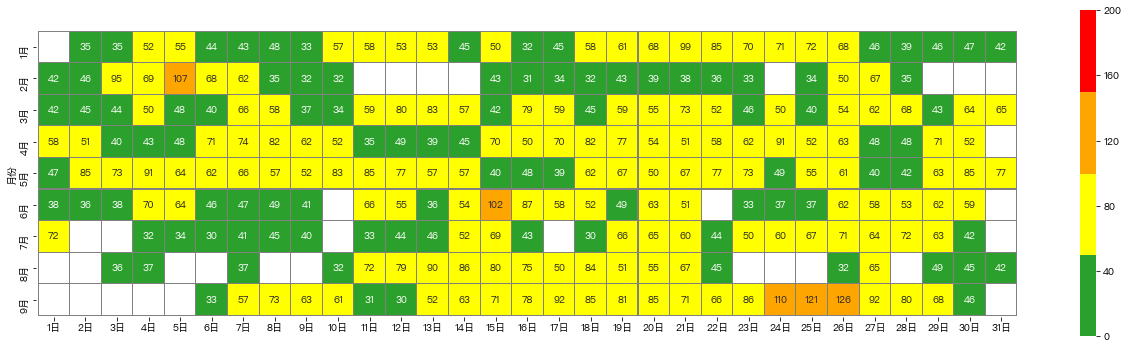

In [3]:
cm_light = mpl.colors.ListedColormap(['tab:green','yellow','orange','red'])
plt.figure(figsize=(22,6))
# mask标记过滤值
lw=.05
ax = sns.heatmap(df, square=True, annot=True, vmin=0, vmax=200, fmt='.0f', linewidths=lw
                , linecolor='gray', mask=df<30, cmap=cm_light)

ax.set_ylim(-lw, len(df)+lw)
ax.set_xlim(-lw, len(df.columns)+lw)
plt.show()

### 自定义颜色及colormap的线性映射

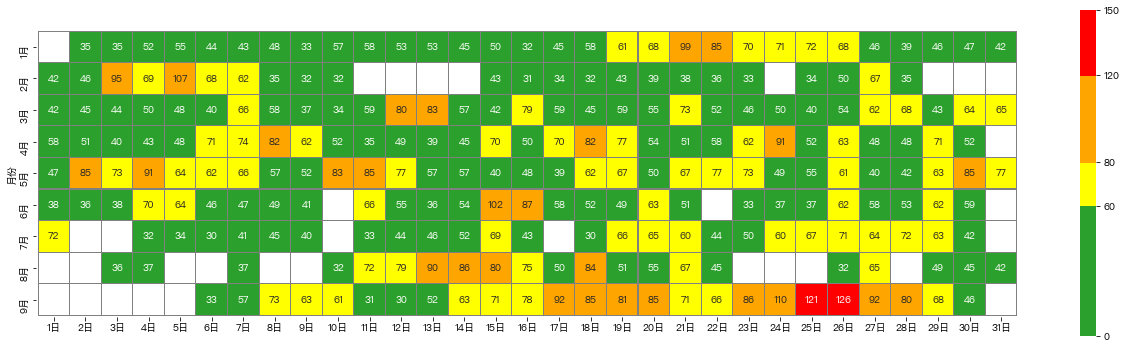

In [4]:
# 自定义黄色颜色
y = np.array([255, 255, 0])/255
colors = ['tab:green',y,'orange','red']
# 自由设定颜色区间
bounds = [0, 60, 80, 120, 150]
# bounds = [0, 75, 150, 225, 300] # 也可以均匀划分
cm_light = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(bounds, cm_light.N)

plt.figure(figsize=(22,6))
lw = .05
# cbar_kws设定颜色标尺的ticks线性分布
ax = sns.heatmap(df, square=True, annot=True, vmin=0, vmax=200, fmt='.0f', linewidths=lw,
                linecolor='gray', mask=df<30, cmap=cm_light, norm=norm, 
                 cbar_kws={'ticks': bounds, 'spacing':'proportional'})


# 防止显示不全（有的版本及操作系统会遇到这个问题）
plt.ylim(-lw, len(df)+lw)
plt.xlim(-lw, len(df.columns)+lw)
plt.show()

## 自定义热力图标签
+ 这里实现的方式比较讨巧，普适性不够。

In [5]:
file = r'../data/city_normal.xls'
data = pd.read_excel(file, index_col=0)
data.head()

城市名称         日期  AQI        首要污染物 空气质量类别 城市名称.1       日期.1  AQI.1 首要污染物.1  \
0   市1 2020-01-01   32            —      优     市2 2020-01-01     42       —   
1   市1 2020-01-02   40            —      优     市2 2020-01-02     47       —   
2   市1 2020-01-03   50            —      优     市2 2020-01-03     49       —   
3   市1 2020-01-04   55  细颗粒物(PM2.5)      良     市2 2020-01-04     49       —   
4   市1 2020-01-05   41            —      优     市2 2020-01-05     49       —   

  空气质量类别.1  ... 城市名称.6       日期.6  AQI.6 首要污染物.6 空气质量类别.6 城市名称.7       日期.7  \
0        优  ...     市7 2020-01-01     38       —        优     市8 2020-01-01   
1        优  ...     市7 2020-01-02     40       —        优     市8 2020-01-02   
2        优  ...     市7 2020-01-03     41       —        优     市8 2020-01-03   
3        优  ...     市7 2020-01-04     47       —        优     市8 2020-01-04   
4        优  ...     市7 2020-01-05     46       —        优     市8 2020-01-05   

   AQI.7    首要污染物.7 空气质量类别.7  
0     33          —        优  
1     52  颗粒物(PM10)        良  
2     55  颗粒物(PM10)        良  
3     54  颗粒物(PM10)        良  
4     49          —        优  

[5 rows x 40 columns]

In [6]:
citys = ['市%d'%i for i in range(1, 9)]
# 获取数据
col = data.iloc[:, 1].dt.day.apply(lambda s: f'{s}日')
dt = pd.DataFrame(data.iloc[:, 2::5].values.T, index=citys, columns=col)
dt.head()

日期  1日  2日  3日  4日  5日  6日  7日  8日  9日  10日  ...  22日  23日  24日  25日  26日  \
市1  32  40  50  55  41  47  43  56  60   49  ...   63   58   37   46   20   
市2  42  47  49  49  49  57  59  68  60   55  ...   92   80   40   60   33   
市3  42  40  35  43  64  40  46  65  52   69  ...   73   69   33   77   20   
市4  37  45  48  52  54  51  67  66  46   62  ...  105   84   46   54   30   
市5  47  55  64  67  73  64  74  58  61   69  ...   74   57   48   60   24   

日期  27日  28日  29日  30日  31日  
市1   28   30   39   47   46  
市2   42   35   47   60   67  
市3   26   23   36   45   49  
市4   35   29   38   48   55  
市5   35   28   41   47   57  

[5 rows x 31 columns]

In [7]:
import re
def get_label(s):
    if s == '—':
        return '\n'*2
    else:
        reg = re.compile(r'.*?\((.*?)\).*?')
        res = '\n' + '\n'.join(reg.findall(s))
        return res + '\n'*(2-res.count('\n'))
def _map(series, func):
    return series.apply(func)

In [8]:
labels = pd.DataFrame(data.iloc[:, 3::5].values.T, columns=dt.columns, index=dt.index)

labels = labels.apply(_map, args=(get_label,))
labels = dt.astype(str) + labels

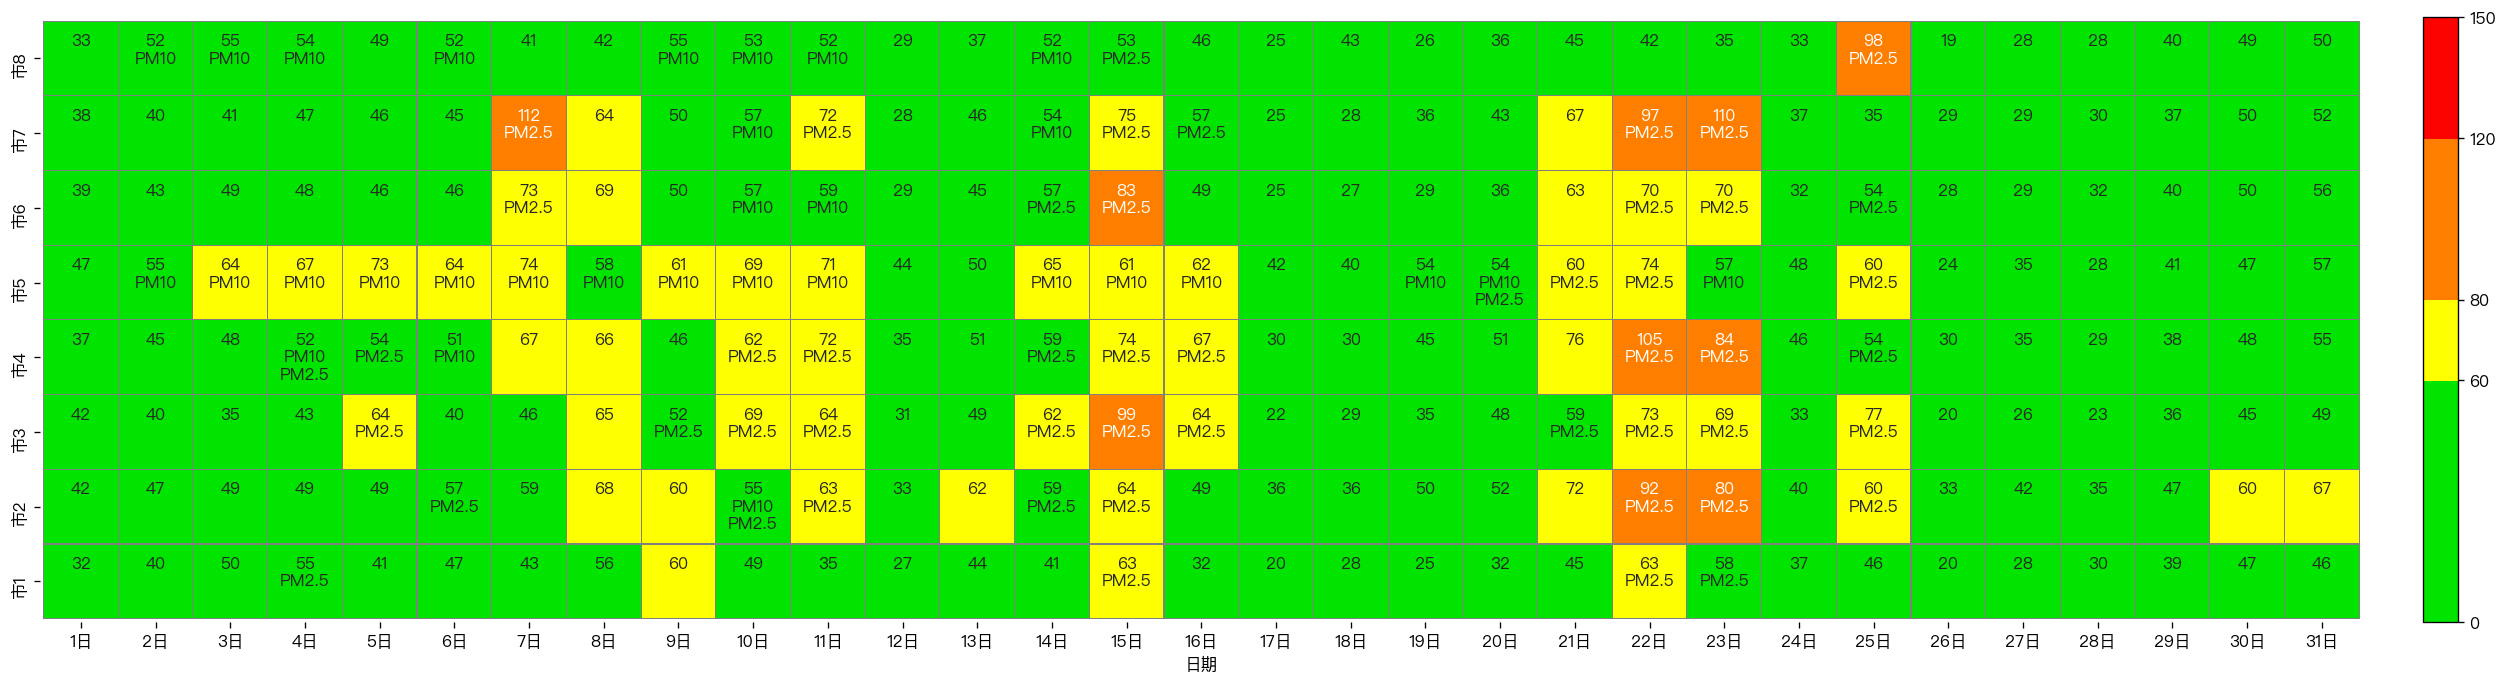

In [9]:
fig, ax = plt.subplots(figsize=(26, 10), dpi=120)

colors = ['#00E400', '#FEFF00', '#FE7E00', '#FC0201']
# 自由设定颜色区间
bounds = [0, 60, 80, 120, 150]
cm_light = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(bounds, cm_light.N)
lw = .05
ax = sns.heatmap(dt, square=True, annot=labels, fmt='', vmin=0, vmax=200, cmap=cm_light, cbar=False,
                linewidths=lw, linecolor='gray', norm=norm)

plt.ylim(-lw, len(dt)+lw)
plt.xlim(-lw, len(dt.columns)+lw)

# 调整cbar的位置
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1.5%", pad=0.5)
cb = ax.figure.colorbar(ax.collections[0], cax=cax, ticks=bounds, spacing='proportional')

plt.show()

## 基于pyecharts的日历图

In [10]:
# 导入时间处理常用的包
import datetime
# 导入pyecharts绘制日历图的包
from pyecharts import options as opts
from pyecharts.charts import Calendar

In [11]:
values = df.iloc[::-1, :].to_numpy()
begin = pd.datetime(2019, 1, 1)
count, data = 0, []
for row in values:
    for val in row:
        data.append([str(begin + datetime.timedelta(count)), val])
        count += 1

c = (
    Calendar()
    .add("", data, calendar_opts=opts.CalendarOpts(range_=["2019-01", '2019-10']))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="2019年数据展示"),
        visualmap_opts=opts.VisualMapOpts(
            max_=200,
            min_=0,
            orient="horizontal",
            is_piecewise=True,
            pos_top="230px",
            pos_left="100px",
        ),
    )
)

c.render_notebook()

In [12]:
time_range = pd.date_range(start='2019-1-1', end='2019-2-28', freq='D')
aqi = list(np.random.randint(30, 300, len(time_range)))
data = [[str(time), float(val)] for time, val in zip(time_range, aqi)]
c = (
    Calendar()
    .add("", data, calendar_opts=opts.CalendarOpts(range_=['2019-01-01', '2019-02-28']))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="2019年1-2月大气污染"),
        visualmap_opts=opts.VisualMapOpts(
            orient="vertical",
            is_piecewise=True,
            pos_top="60px",
            pos_left="300px",
            
            
            pieces=[
#                 {'min': 0, 'max': 50, 'label': '优', 'color': '#86EEA4'},
#                 {'min': 50, 'max': 100, 'label': '良', 'color': '#FFF063'},
#                 {'min': 100, 'max': 150, 'label': '轻度', 'color': '#FFB951'},
#                 {'min': 150, 'max': 200, 'label': '中度', 'color': '#FF6F6B'},
#                 {'min': 200, 'max': 250, 'label': '重度', 'color': '#E37CB1'},
#                 {'min': 250, 'max': 300, 'label': '严重', 'color': '#C74565'},
                {'min': 0, 'max': 50, 'label': '优', 'color': '#79CF20'},
                {'min': 50, 'max': 100, 'label': '良', 'color': '#FBD02B'},
                {'min': 100, 'max': 150, 'label': '轻度', 'color': '#FB931A'},
                {'min': 150, 'max': 200, 'label': '中度', 'color': '#FB1717'},
                {'min': 200, 'max': 250, 'label': '重度', 'color': '#990656'},
                {'min': 250, 'max': 300, 'label': '严重', 'color': '#6F1932'},
            ],
        ),
        toolbox_opts=opts.ToolboxOpts(pos_right=20),
    )
)
c.render_notebook()